# TABULAR PLAYGROUND SERIES DEC 2021

## MY NOTEBOOK

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
FOLDER_PATH = 'tps-dec-2021'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'

TRAIN_PATH = os.path.join(FOLDER_PATH, TRAIN_FILE)
TEST_PATH = os.path.join(FOLDER_PATH, TEST_FILE)

### DATA OVERVIEW

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [4]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [5]:
train_df.shape

(4000000, 56)

In [6]:
train_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [7]:
train_df.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [22]:
train_df['Cover_Type'].value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

In [23]:
train_sample = train_df[train_df['Cover_Type']!=5]
train_sample['Cover_Type'].value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
Name: Cover_Type, dtype: int64

In [25]:
train_sample = train_sample.groupby('Cover_Type').apply(
    lambda x: x.sample(frac=0.02))

In [27]:
train_sample.head()

Id  Elevation  Aspect  Slope  \
Cover_Type                                              
1          1864647  1864647       3283      53     12   
           2750146  2750146       3339     240     10   
           1789297  1789297       3020     370      4   
           797691    797691       3529     369     21   
           2379314  2379314       3734     113     14   

                    Horizontal_Distance_To_Hydrology  \
Cover_Type                                             
1          1864647                               144   
           2750146                               162   
           1789297                               114   
           797691                                332   
           2379314                               146   

                    Vertical_Distance_To_Hydrology  \
Cover_Type                                           
1          1864647                             145   
           2750146                               7   
           1789297                               0   
           797691                               56   
           2379314                             184   

                    Horizontal_Distance_To_Roadways  Hillshade_9am  \
Cover_Type                                                           
1          1864647                              786            165   
           2750146                              606            255   
           1789297                             2405            197   
           797691                              2197            237   
           2379314                             2839            211   

                    Hillshade_Noon  Hillshade_3pm  \
Cover_Type                                          
1          1864647             239            104   
           2750146             206            117   
           1789297             228            116   
           797691              222            140   
           2379314             227            213   

                    Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
Cover_Type                                                                 
1          1864647                                 274                 0   
           2750146                                2554                 1   
           1789297                                6456                 0   
           797691                                 1815                 0   
           2379314                                 809                 1   

                    Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
Cover_Type                                                                 
1          1864647                 0                 1                 0   
           2750146                 0                 0                 0   
           1789297                 0                 1                 0   
           797691                  0                 1                 0   
           2379314                 0                 0                 0   

                    Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  \
Cover_Type                                                           
1          1864647           0           0           0           0   
           2750146           0           0           0           0   
           1789297           0           0           0           0   
           797691            0           0           0           0   
           2379314           0           0           0           0   

                    Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  \
Cover_Type                                                           
1          1864647           0           0           0           0   
           2750146           0           0           0           0   
           1789297           0           0           0           0   
           797691            0           0           0           0   
           23

In [29]:
train_sample = train_sample.droplevel(0)
train_sample.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1864647,1864647,3283,53,12,144,145,786,165,239,104,274,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2750146,2750146,3339,240,10,162,7,606,255,206,117,2554,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1789297,1789297,3020,370,4,114,0,2405,197,228,116,6456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
797691,797691,3529,369,21,332,56,2197,237,222,140,1815,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2379314,2379314,3734,113,14,146,184,2839,211,227,213,809,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
train_sample['Cover_Type'].value_counts()

2    45242
1    29363
3     3914
7     1245
6      229
4        8
Name: Cover_Type, dtype: int64

### NUMERICAL FEATURES

In [9]:
num_cols = train_df.columns.tolist()[1:11]
num_cols

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [10]:
cat_cols = train_df.columns.tolist()[11:55]
cat_cols

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

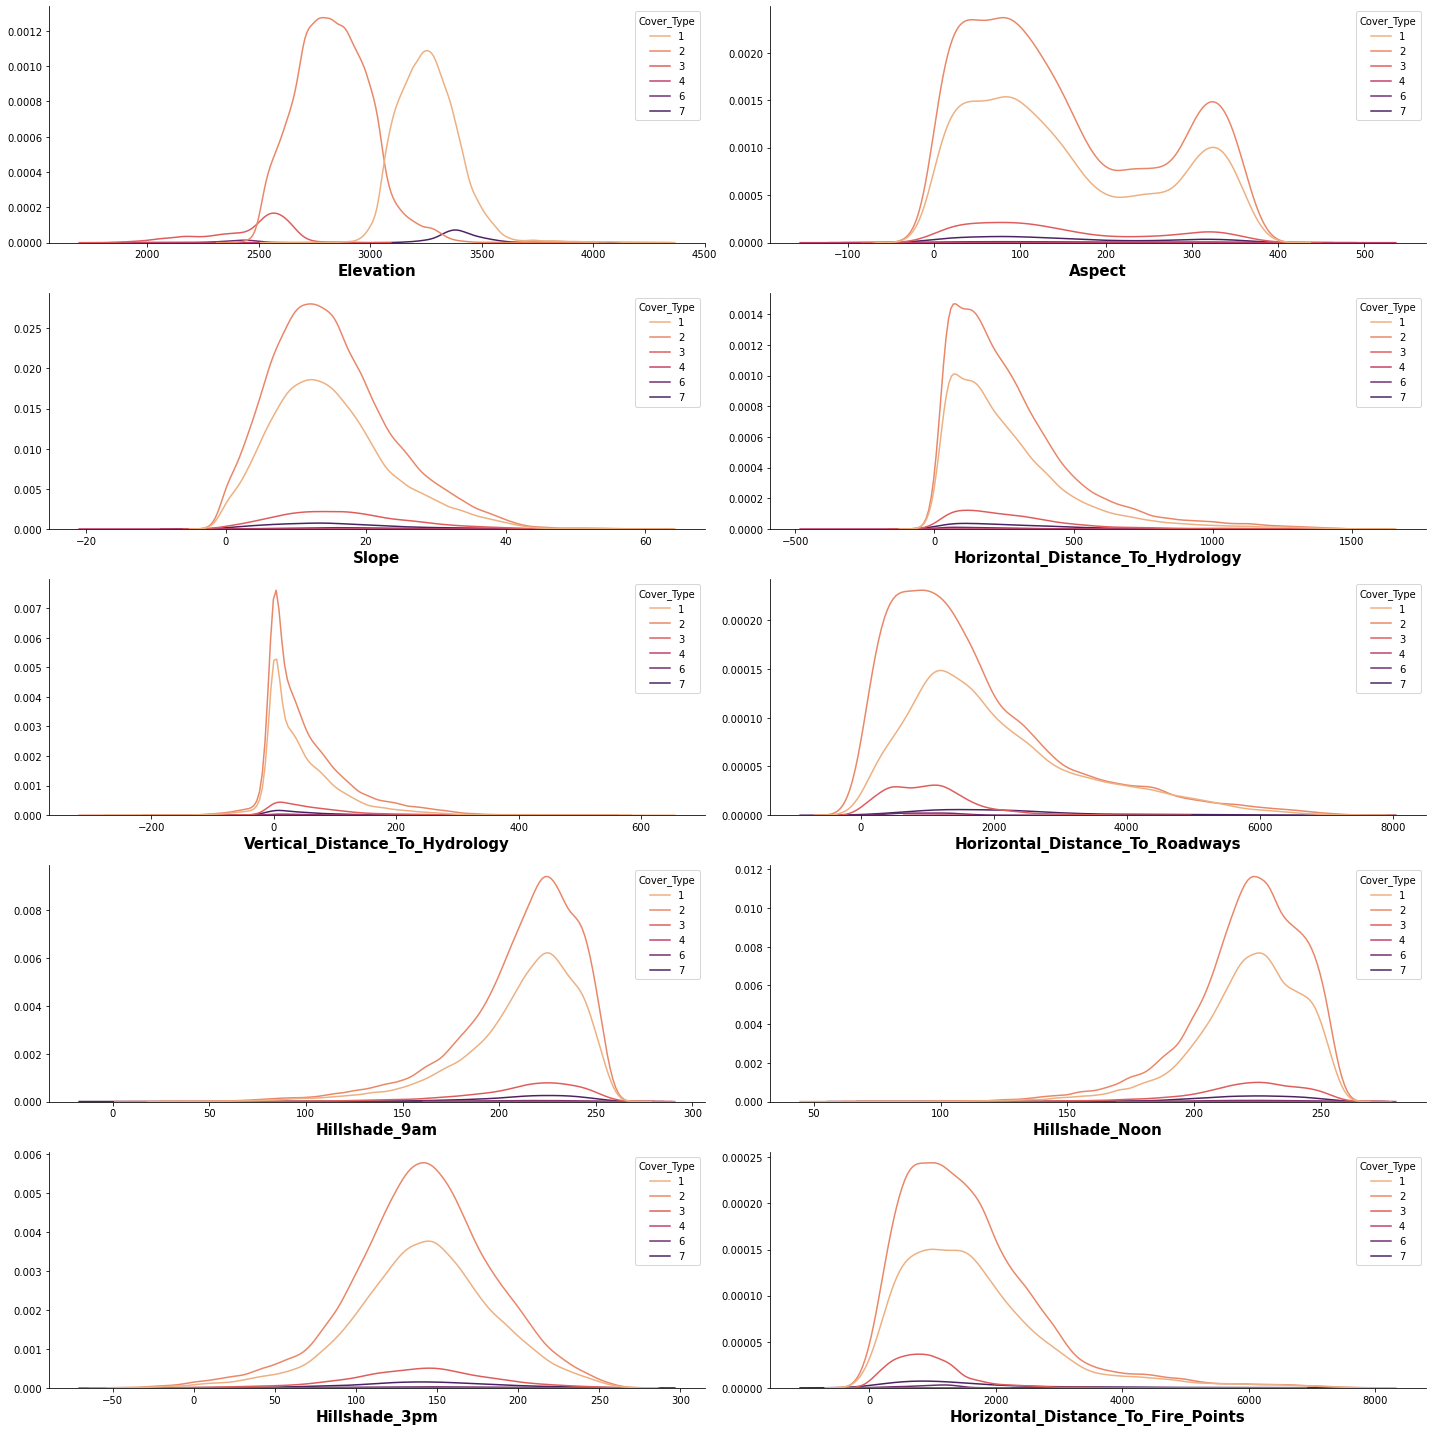

In [35]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=train_sample, x=col, hue='Cover_Type', 
                palette='flare', ax=axes[i])
    for s in ['top', 'right']:
        axes[i].spines[s].set_visible(False)
        
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col, fontsize=15, weight='bold')

plt.tight_layout()
plt.show()

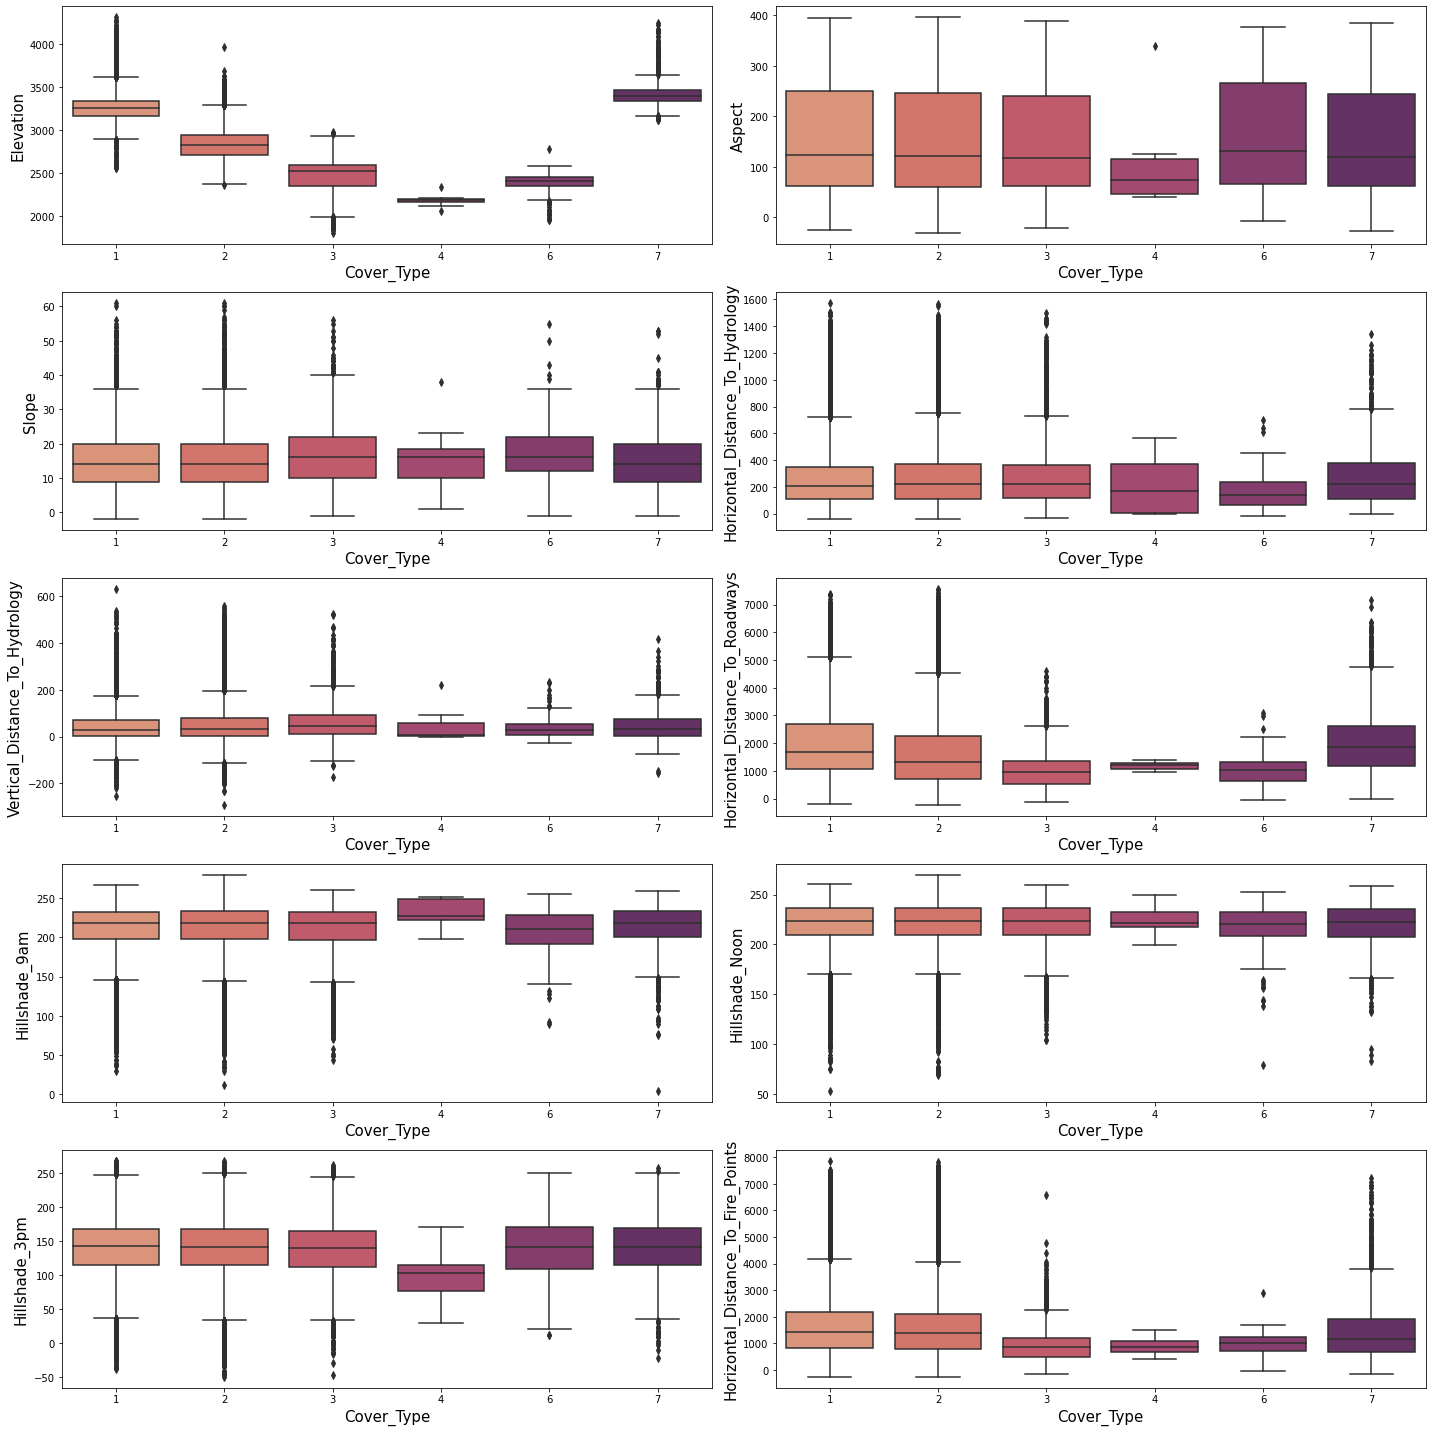

In [41]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols): 
    sns.boxplot(data=train_sample, y=col, x='Cover_Type', 
               palette='flare', ax=axes[i])
    
    axes[i].set_xlabel('Cover_Type', fontsize=15)
    axes[i].set_ylabel(col, fontsize=15)
    
plt.tight_layout()
plt.show()

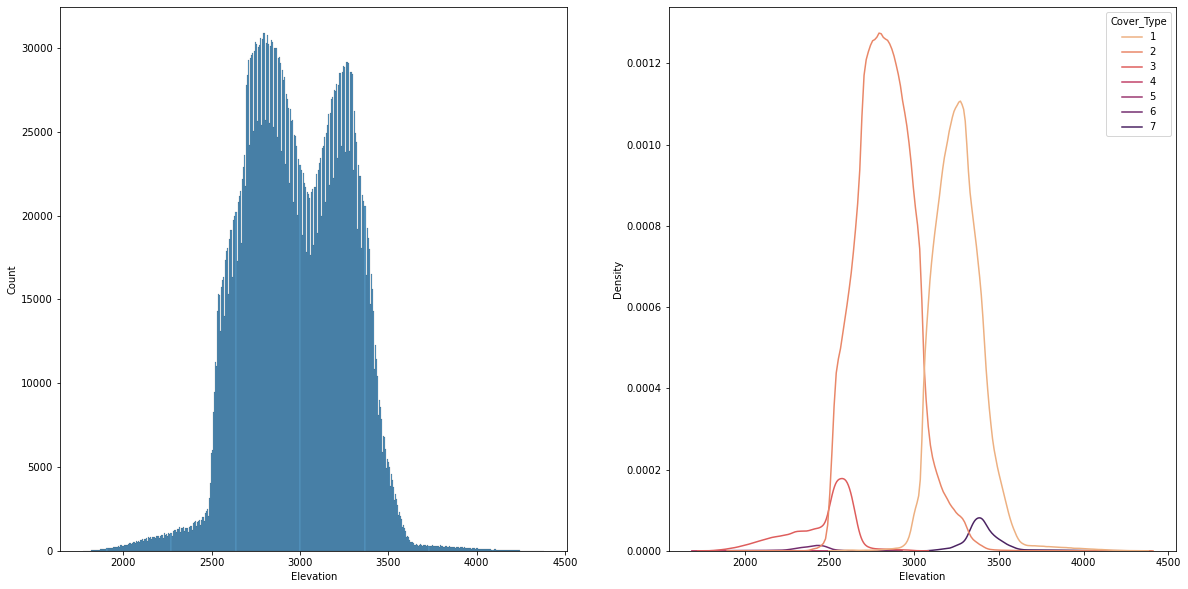

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[0], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[0], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

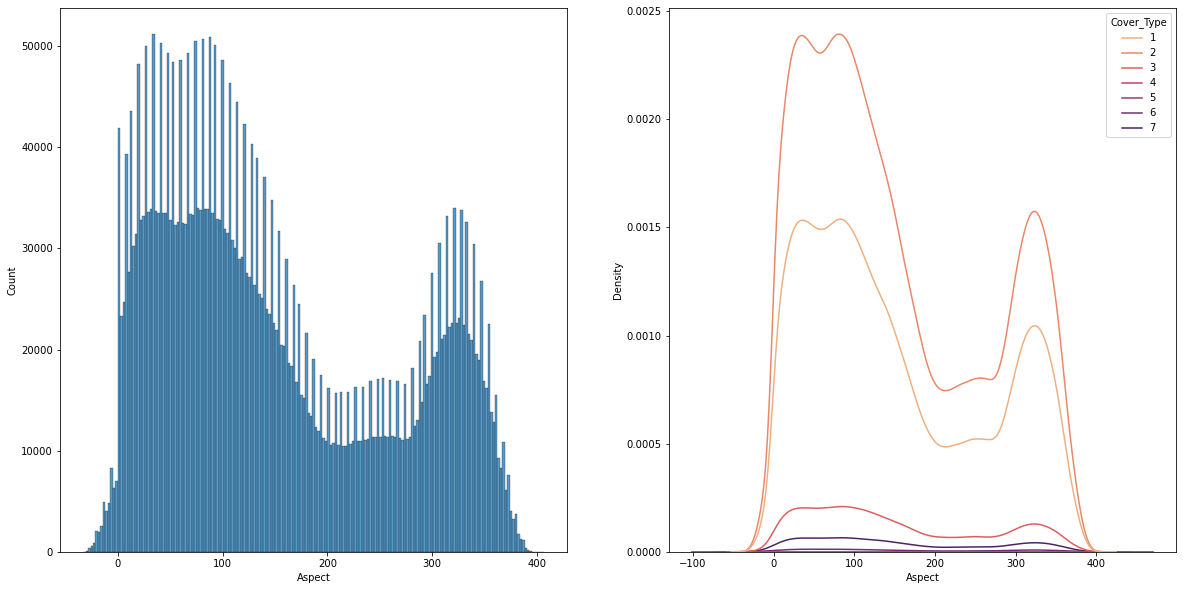

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[1], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[1], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

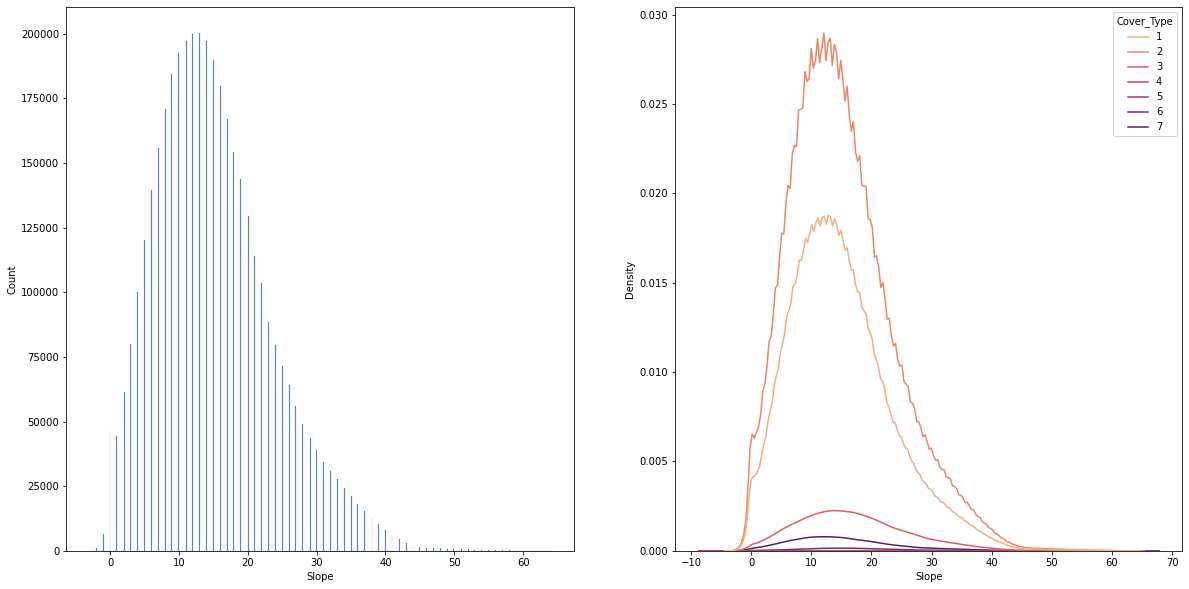

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[2], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[2], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

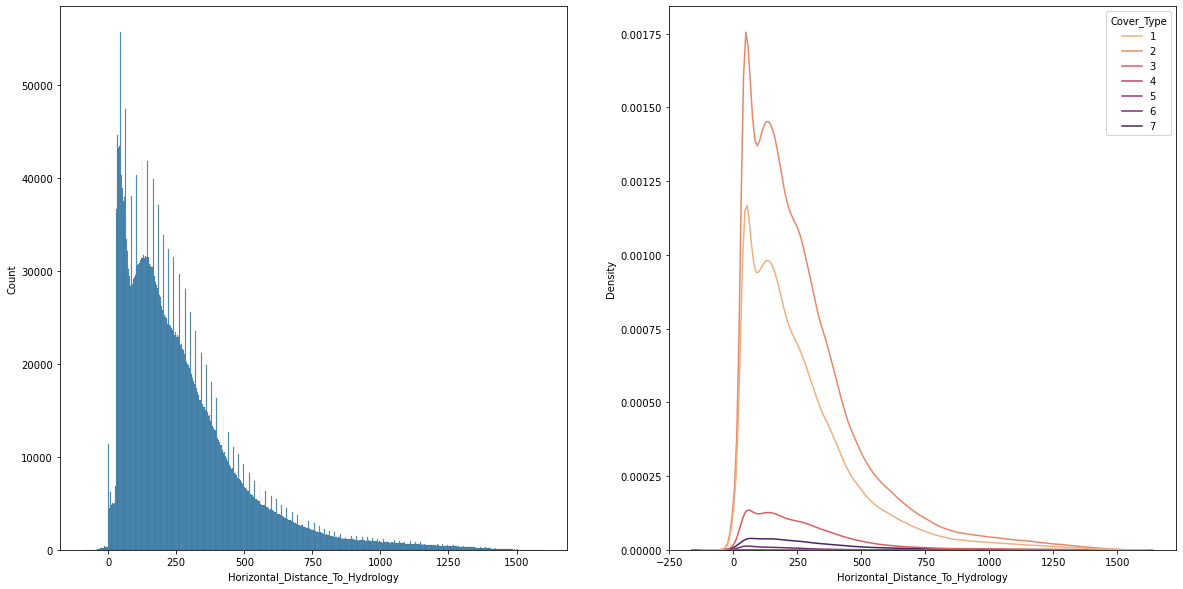

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[3], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[3], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

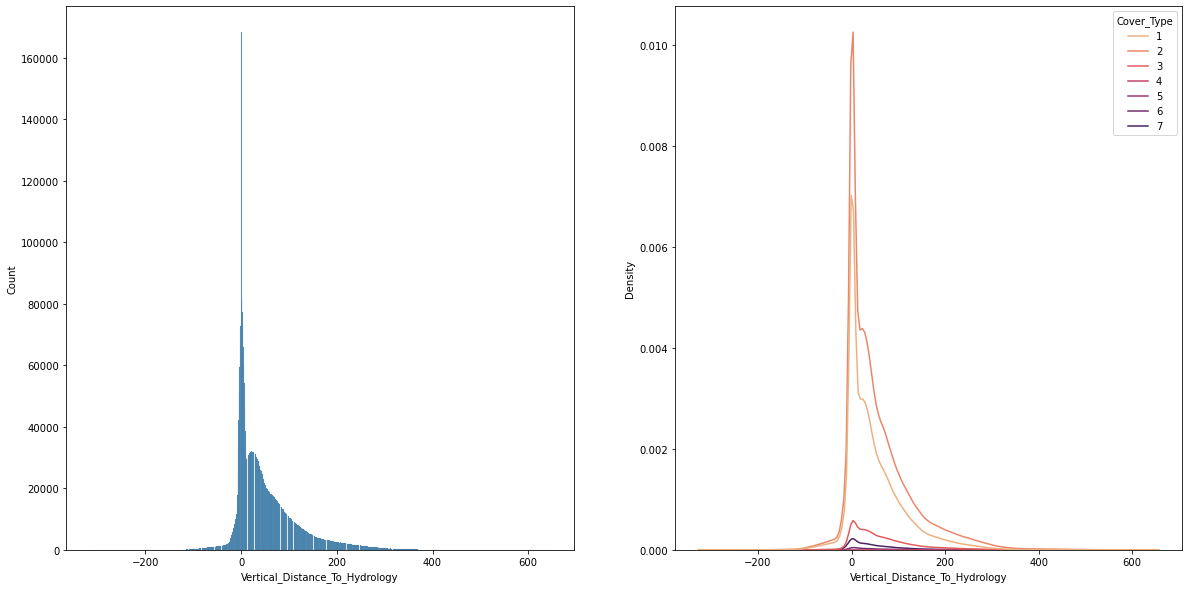

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[4], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[4], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

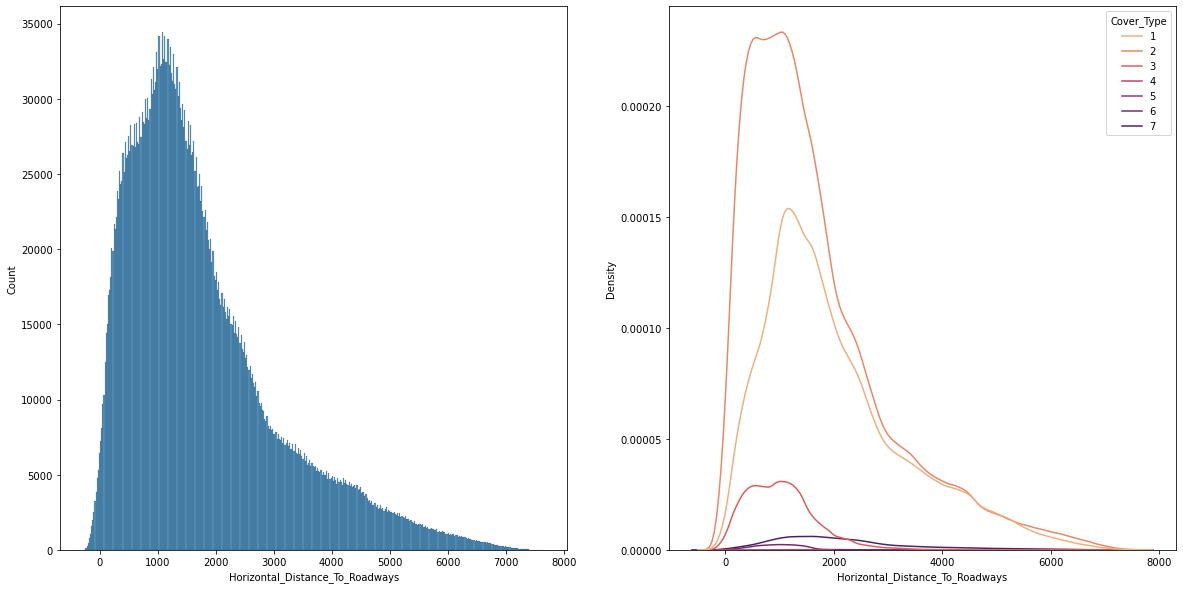

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[5], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[5], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

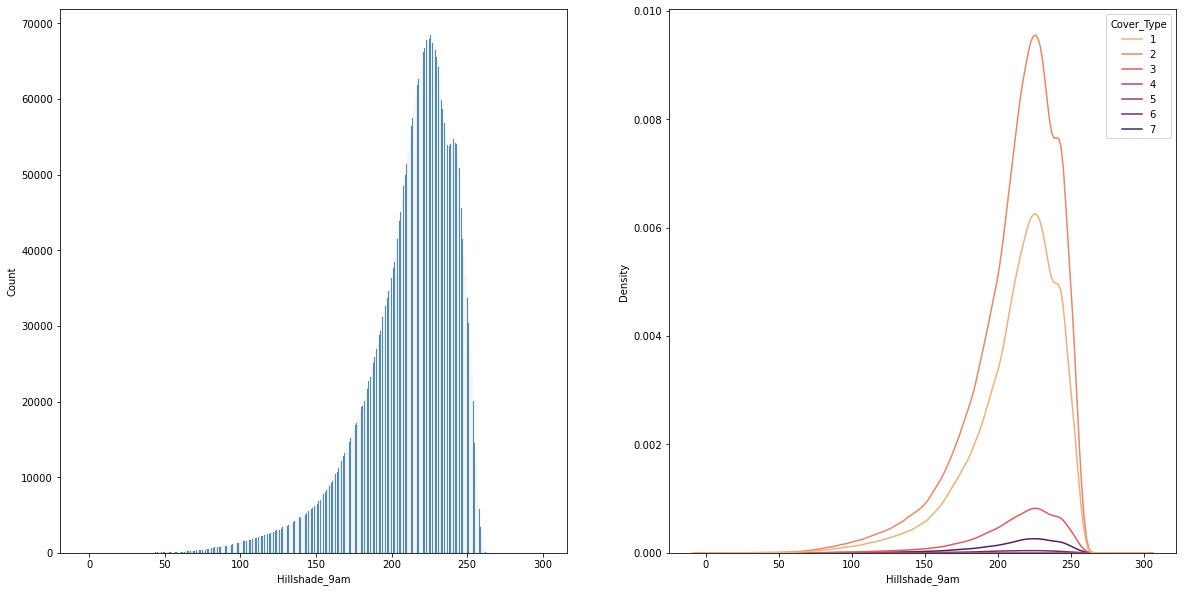

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[6], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[6], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

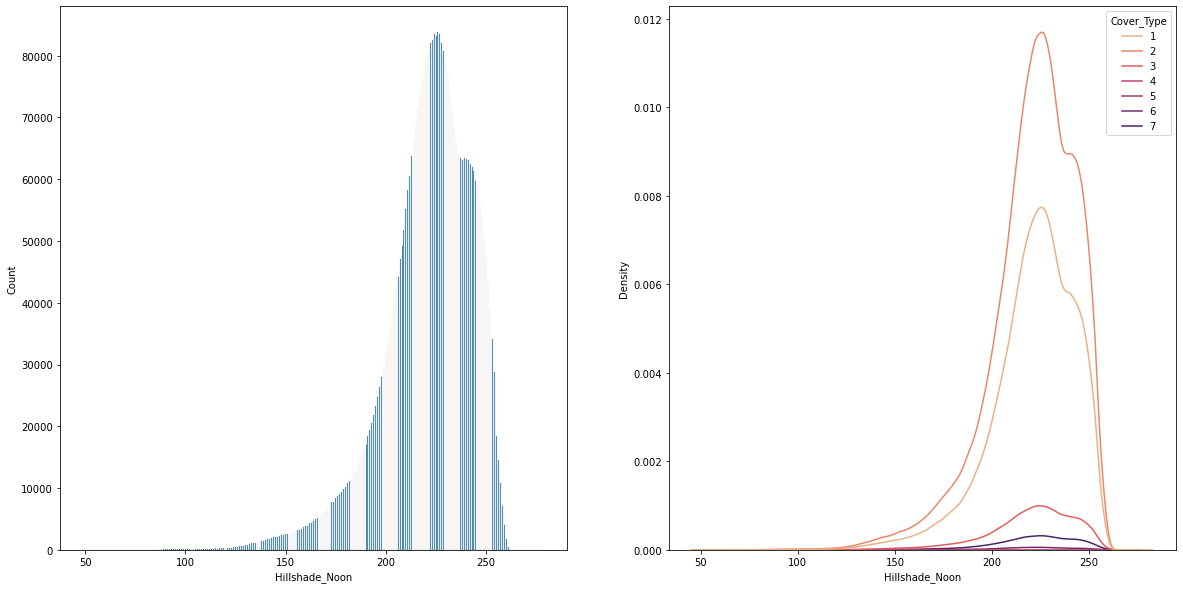

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[7], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[7], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

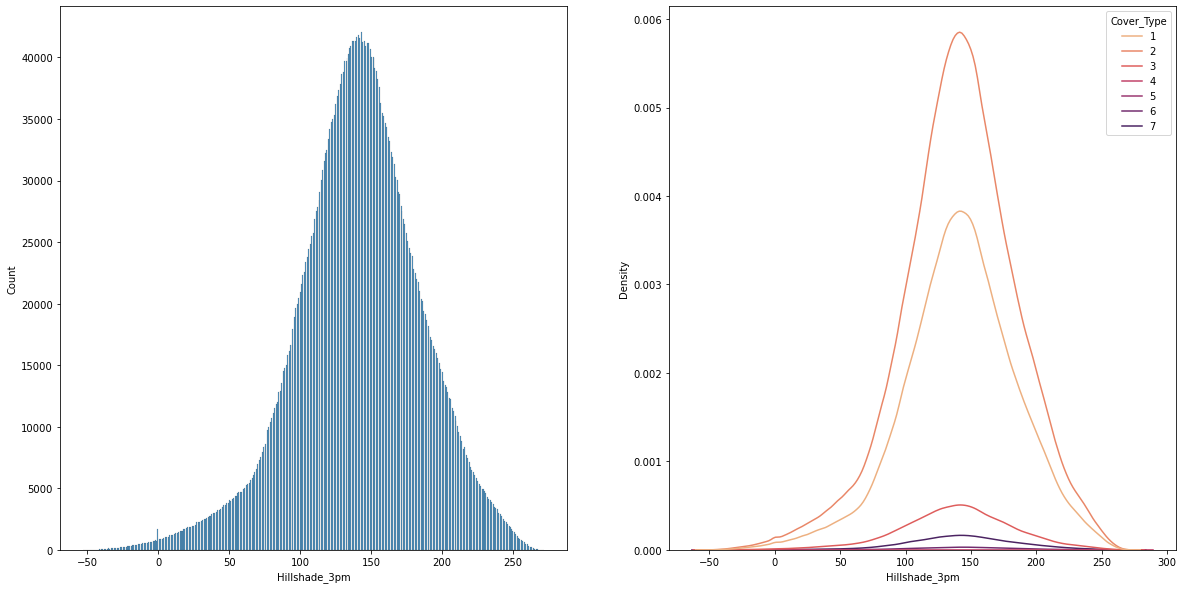

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[8], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[8], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

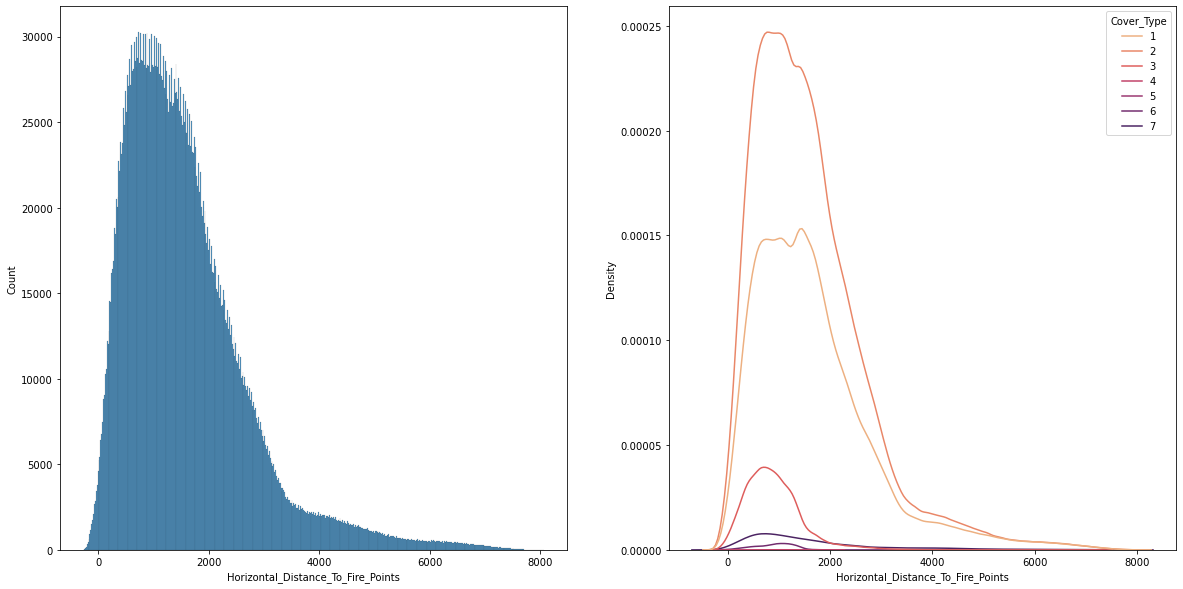

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=train_df, x=num_cols[9], ax=axes[0])
sns.kdeplot(data=train_df, x=num_cols[9], hue='Cover_Type', 
            palette='flare', warn_singular=False, ax=axes[1])

plt.show()

<AxesSubplot:>

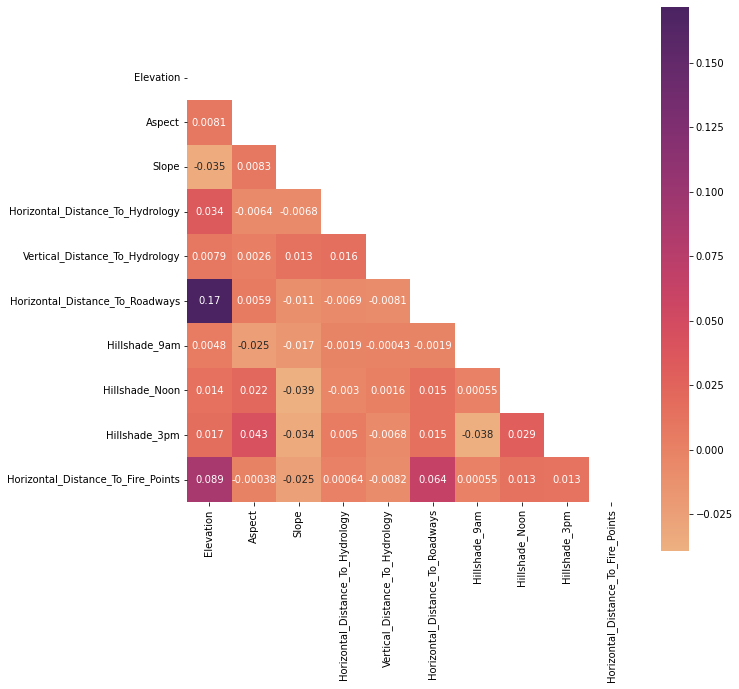

In [21]:
plt.figure(figsize=(10, 10))

corr = train_df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap='flare', square=True, mask=mask, annot=True)

### CATEGORICAL FEATURES

In [46]:
wild_cols = [col for col in cat_cols if col.startswith('W')]
print(wild_cols)
print('---------------------')
soil_cols = [col for col in cat_cols if col.startswith('S')]
print(soil_cols)

['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
---------------------
['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [53]:
# Check if the wilderness areas are mutually exclusive
# The wilderness area is not mutually exclusive because the sum value has more values other than 1

train_sample['Wilderness_Total'] = 0

for col in wild_cols:
    train_sample['Wilderness_Total'] += train_sample[col]

train_sample['Wilderness_Total'].value_counts()

1    71887
0     4844
2     3266
3        4
Name: Wilderness_Total, dtype: int64

In [56]:
# Check if the soild types are mutually exclusive
# The soil types are not mutually exclusive because the sum value has more values other than 1

train_sample['Soil_Total'] = 0

for col in soil_cols:
    train_sample['Soil_Total'] += train_sample[col]

train_sample['Soil_Total'].value_counts()

0    33116
1    31204
2    12428
3     2815
4      399
5       35
6        3
7        1
Name: Soil_Total, dtype: int64

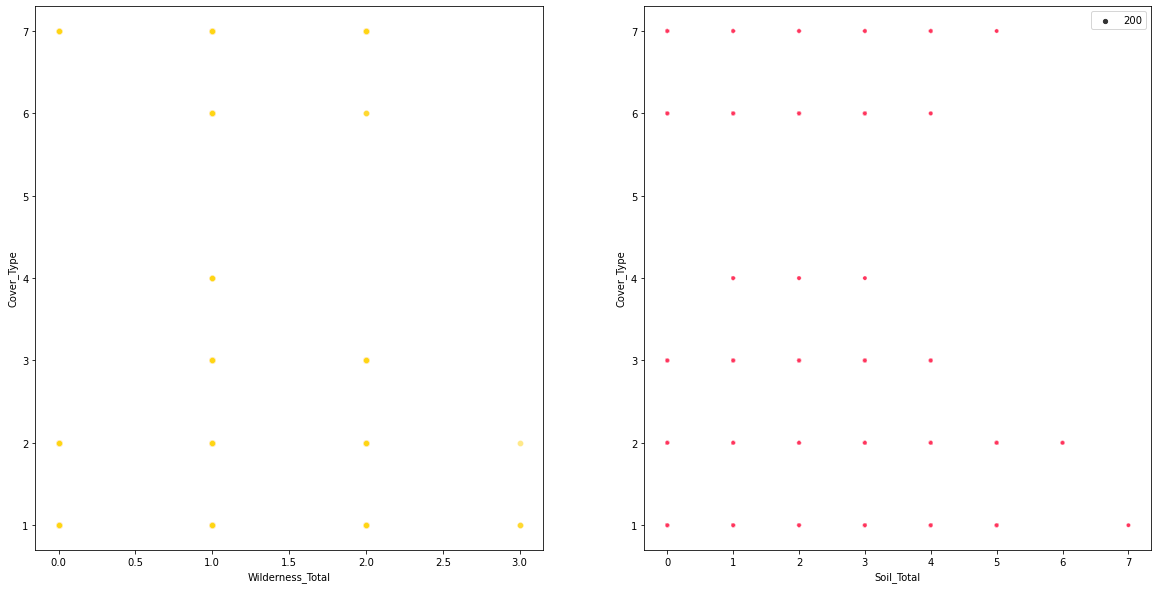

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes = axes.flatten()

sns.scatterplot(data=train_sample, x='Wilderness_Total', sizes=200, color='#ffd514', alpha=0.5, 
                y='Cover_Type', ax=axes[0])
sns.scatterplot(data=train_sample, x='Soil_Total', size=200, color='#ff355d', 
                y='Cover_Type', ax=axes[1])

plt.show()

In [71]:
for col in cat_cols:
    print(train_sample[col].value_counts())
    print('---------------')

0    59049
1    20952
Name: Wilderness_Area1, dtype: int64
---------------
0    76604
1     3397
Name: Wilderness_Area2, dtype: int64
---------------
1    52369
0    27632
Name: Wilderness_Area3, dtype: int64
---------------
0    78288
1     1713
Name: Wilderness_Area4, dtype: int64
---------------
0    78666
1     1335
Name: Soil_Type1, dtype: int64
---------------
0    77518
1     2483
Name: Soil_Type2, dtype: int64
---------------
0    79685
1      316
Name: Soil_Type3, dtype: int64
---------------
0    76983
1     3018
Name: Soil_Type4, dtype: int64
---------------
0    78696
1     1305
Name: Soil_Type5, dtype: int64
---------------
0    79352
1      649
Name: Soil_Type6, dtype: int64
---------------
0    80001
Name: Soil_Type7, dtype: int64
---------------
0    79784
1      217
Name: Soil_Type8, dtype: int64
---------------
0    79104
1      897
Name: Soil_Type9, dtype: int64
---------------
0    75592
1     4409
Name: Soil_Type10, dtype: int64
---------------
0    77695
1     230

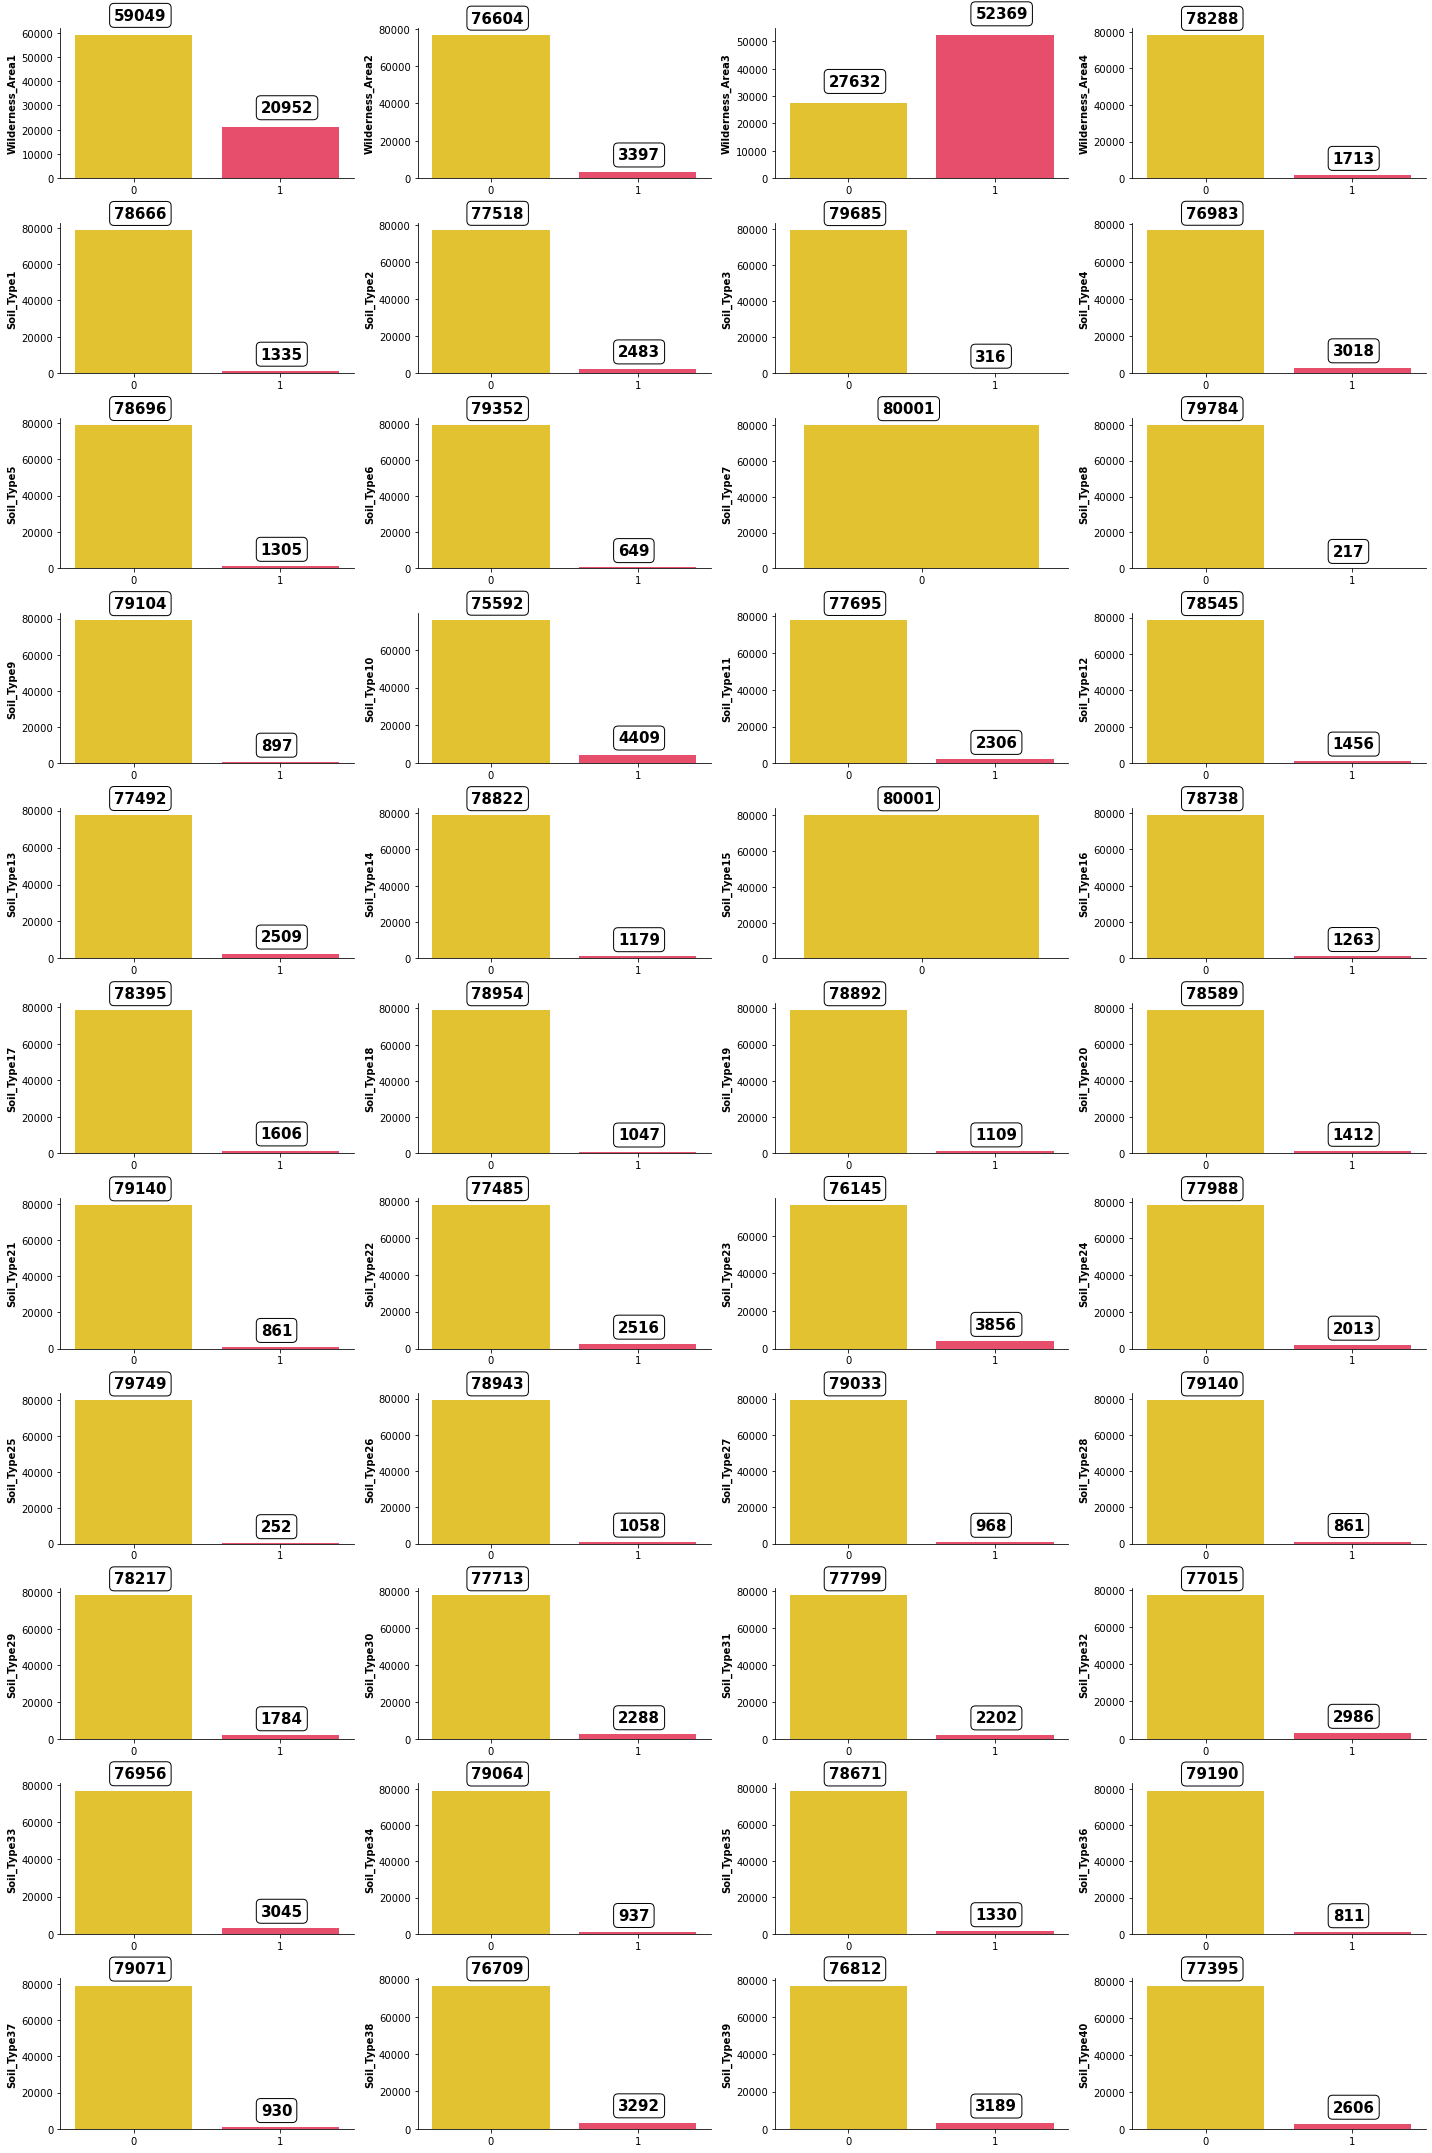

In [123]:
# 'Soil_Type7' and 'Soil_Type15' can be removed as these features have no variance

fig, axes = plt.subplots(11, 4, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(cat_cols): 
    train_sample_counts = train_sample[col].value_counts()
    train_sample_counts = pd.DataFrame(train_sample_counts)
    train_sample_counts = train_sample_counts.reset_index()
    sns.barplot(data=train_sample_counts, x='index', y=col, palette=['#ffd514', '#ff355d'], ax=axes[i])
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=10, weight='bold')
    
    # remove the borders
    for s in ['top', 'right']:
        axes[i].spines[s].set_visible(False)
        
    # annote the counts
    for p in axes[i].patches:
        value = f'{p.get_height():.0f}'
        x = p.get_x() + p.get_width() / 3
        y = p.get_y() + p.get_height() + 5000
        axes[i].text(x, y, value, ha='left', va='bottom', fontsize=15, color='black', weight='bold', 
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1))

plt.tight_layout()
plt.show()

### MODELING
#### Linear Model with Numeric Features Only

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [130]:
train_num = train_df[train_df['Cover_Type']!=5].copy()

X = train_num[num_cols].values
y = train_num['Cover_Type'].values

In [147]:
train_sample = train_df.groupby('Cover_Type').apply(
    lambda x: x.sample(frac=0.1))

X = train_sample[num_cols].values
y = train_sample['Cover_Type'].values

In [148]:
%%time

lr = LogisticRegression(multi_class='multinomial', 
                        solver='saga', max_iter=10_000)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, 
                                                      random_state=42, test_size=0.1)

lr.fit(X_train, y_train)

CPU times: total: 14min 26s
Wall time: 14min 29s


LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga')

In [149]:
y_pred = lr.predict(X_valid)

In [150]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.72      0.72     14682
           2       0.77      0.84      0.80     22621
           3       0.77      0.28      0.41      1957
           4       0.00      0.00      0.00         4
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       623

    accuracy                           0.75     40001
   macro avg       0.38      0.31      0.32     40001
weighted avg       0.74      0.75      0.74     40001



C:\Users\Fan\Anaconda3\envs\sales\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fan\Anaconda3\envs\sales\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fan\Anaconda3\envs\sales\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


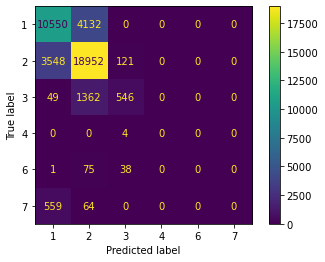

In [151]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred)

#### Linear Model with Numeric and Categorical Features

In [4]:
train_sample = train_df.groupby('Cover_Type').apply(
    lambda x: x.sample(frac=0.1))

X = train_sample.drop(columns=['Id', 'Cover_Type', 'Soil_Type7', 'Soil_Type15']).values
y = train_sample['Cover_Type'].values

In [7]:
%%time

lr = LogisticRegression(multi_class='multinomial', 
                        solver='saga', max_iter=10_000)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, 
                                                      random_state=42, test_size=0.1)

lr.fit(X_train, y_train)

CPU times: total: 1h 23min 29s
Wall time: 1h 23min 46s


LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga')

In [9]:
y_pred = lr.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.74      0.74     14682
           2       0.79      0.85      0.82     22621
           3       0.83      0.36      0.50      1957
           4       0.00      0.00      0.00         4
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       623

    accuracy                           0.77     40001
   macro avg       0.39      0.33      0.34     40001
weighted avg       0.76      0.77      0.76     40001



C:\Users\Fan\Anaconda3\envs\sales\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fan\Anaconda3\envs\sales\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fan\Anaconda3\envs\sales\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


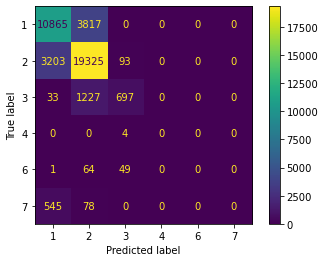

In [11]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred)